# Data 512 A1 : Data Curation
## Mayank Goel

### Step 1: Gathering the data

This process introduces the endpoint and parameters for APIs, and then gathers and stores the data in json format

In [389]:
# importing libraries
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

Defining endpoints and parameters to be used later in processing.

In [316]:
# defining the endpoints for the two APIs
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [370]:
# Define parameters for each type of data
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_legacy_mobile_web = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020090100"
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020090100"
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020090100"
                        }

headers = {
    'User-Agent': 'https://github.com/mickkygoel',
    'From': 'mickky@uw.edu'
}

Define necessary functions for ease of use later

In [396]:
# function to call the endpoint and fetch the data as json
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()    
    return response

# function to convert the json to pandas dataframe
def convert_to_df(json):
    df = pd.DataFrame.from_records(list(json.values())[0])
    return df

Fetch the data and store it in json files

In [373]:
# Fetch the data for all 5 types and store it in object
pageviews_desktop_json = api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobile_app_json = api_call(endpoint_pageviews, params_pageviews_mobile_app)
pageviews_mobile_web_json = api_call(endpoint_pageviews, params_pageviews_mobile_web)
legacy_mobile_web_json = api_call(endpoint_legacy, params_legacy_mobile_web)
legacy_desktop_json = api_call(endpoint_legacy, params_legacy_desktop)


# Save the data as json files
with open('pagecounts_mobile-site_200801-201607.json', 'w') as json_file:
    json.dump(legacy_mobile_web_json, json_file)
with open('pagecounts_desktop-site_200801-201607.json', 'w') as json_file:
    json.dump(legacy_desktop_json, json_file)
with open('pageviews_desktop_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_desktop_json, json_file)
with open('pageviews_mobile-web_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_mobile_app_json, json_file)
with open('pageviews_mobile-app_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_mobile_web_json, json_file)

### Step 2: Processing the data

Processing steps on the above data files in order to prepare them for analysis. This would help in the analysis step which comes later.

**Processing the pageviews desktop data and extracting dataframe**

In [374]:
# Calling function to convert json to pandas dataframe
pageviews_desktop_df = convert_to_df(pageviews_desktop_json)

# extracting the relevant columns and renaming them
pageviews_desktop_df = pageviews_desktop_df.set_index('timestamp')
pageviews_desktop_df = pageviews_desktop_df[['views']]
pageviews_desktop_df = pageviews_desktop_df.rename(columns={'views': 'pageview_desktop_views'})

# Glimpse of the data
pageviews_desktop_df.head()

,pageview_desktop_views
timestamp,
2015070100,4376666686
2015080100,4332482183
2015090100,4485491704
2015100100,4477532755
2015110100,4287720220


**Processing the pageviews mobile app data and extracting dataframe**

In [375]:
# Calling function to convert json to pandas dataframe
pageviews_mobile_app_df = convert_to_df(pageviews_mobile_app_json)

# extracting the relevant columns and renaming them
pageviews_mobile_app_df = pageviews_mobile_app_df.set_index('timestamp')
pageviews_mobile_app_df = pageviews_mobile_app_df[['views']]
pageviews_mobile_app_df = pageviews_mobile_app_df.rename(columns={'views': 'pageview_mobile_app_views'})

# Glimpse of the data
pageviews_mobile_app_df.head()

,pageview_mobile_app_views
timestamp,
2015070100,109624146
2015080100,109669149
2015090100,96221684
2015100100,94523777
2015110100,94353925


**Processing the pageviews mobile site data and extracting dataframe**

In [376]:
# Calling function to convert json to pandas dataframe
pageviews_mobile_web_df = convert_to_df(pageviews_mobile_web_json)

# extracting the relevant columns and renaming them
pageviews_mobile_web_df = pageviews_mobile_web_df.set_index('timestamp')
pageviews_mobile_web_df = pageviews_mobile_web_df[['views']]
pageviews_mobile_web_df = pageviews_mobile_web_df.rename(columns={'views': 'pageview_mobile_web_views'})

# Glimpse of the data
pageviews_mobile_web_df.head()

,pageview_mobile_web_views
timestamp,
2015070100,3179131148
2015080100,3192663889
2015090100,3073981649
2015100100,3173975355
2015110100,3142247145


**Processing the pagecount mobile site data and extracting dataframe**

In [377]:
# Calling function to convert json to pandas dataframe
legacy_mobile_web_df = convert_to_df(legacy_mobile_web_json)

# extracting the relevant columns and renaming them
legacy_mobile_web_df = legacy_mobile_web_df.set_index('timestamp')
legacy_mobile_web_df = legacy_mobile_web_df[['count']]
legacy_mobile_web_df = legacy_mobile_web_df.rename(columns={'count': 'pagecount_mobile_views'})

# Glimpse of the data
legacy_mobile_web_df.head()

,pagecount_mobile_views
timestamp,
2014100100,3091546685
2014110100,3027489668
2014120100,3278950021
2015010100,3485302091
2015020100,3091534479


**Processing the pagecount desktop data and extracting dataframe**

In [378]:
# Calling function to convert json to pandas dataframe
legacy_desktop_df = convert_to_df(legacy_desktop_json)

# extracting the relevant columns and renaming them
legacy_desktop_df = legacy_desktop_df.set_index('timestamp')
legacy_desktop_df = legacy_desktop_df[['count']]
legacy_desktop_df = legacy_desktop_df.rename(columns={'count': 'pagecount_desktop_views'})

# Glimpse of the data
legacy_desktop_df.head()

,pagecount_desktop_views
timestamp,
2008010100,4930902570
2008020100,4818393763
2008030100,4955405809
2008040100,5159162183
2008050100,5584691092


**Collecting all dataframes together and combining them using date stamp**

In [379]:
# using pandas concat function to join dataframes on index which is date
df = pd.concat([pageviews_desktop_df, pageviews_mobile_app_df, pageviews_mobile_web_df,legacy_mobile_web_df, legacy_desktop_df], axis=1, sort=False)
df.head()

,pageview_desktop_views,pageview_mobile_app_views,pageview_mobile_web_views,pagecount_mobile_views,pagecount_desktop_views
2015070100,4.376667e+09,109624146.0,3.179131e+09,3.254473e+09,5.229226e+09
2015080100,4.332482e+09,109669149.0,3.192664e+09,3.268488e+09,5.035534e+09
2015090100,4.485492e+09,96221684.0,3.073982e+09,3.172430e+09,5.409631e+09
2015100100,4.477533e+09,94523777.0,3.173975e+09,3.246083e+09,5.535704e+09
2015110100,4.287720e+09,94353925.0,3.142247e+09,3.218235e+09,5.296956e+09


**Extracting year and month from the datestamp**

In [380]:
# Extracting year
df['year'] = df.index.astype(str).str[:4]

# Extracting month
df['month'] = df.index.astype(str).str[4:6]

**Combining mobile usage from web and app and calculating total usage**

In [381]:
# adding mobile views from app and web
df["pageview_mobile_views"] = df[["pageview_mobile_app_views", "pageview_mobile_web_views"]].sum(axis=1, min_count=1)

# adding mobile and desktop views from pageview API
df["pageview_all_views"] = df[["pageview_mobile_views", "pageview_desktop_views"]].sum(axis=1, min_count=1)

# adding mobile and desktop counts from pagecount API
df["pagecount_all_views"] = df[["pagecount_desktop_views", "pagecount_mobile_views"]].sum(axis=1, min_count=1)


**Adjusting and formatting data for csv**

In [382]:
# arrange the columns in order
df = df[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']]

# sort values by year and month
df = df.sort_values(by=['year','month'])

# Replace null values with 0
df_csv = df.fillna(0)

# glimpse of data
df_csv.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
2008010100,2008,01,4.930903e+09,4.930903e+09,0.0,0.0,0.0,0.0
2008020100,2008,02,4.818394e+09,4.818394e+09,0.0,0.0,0.0,0.0
2008030100,2008,03,4.955406e+09,4.955406e+09,0.0,0.0,0.0,0.0
2008040100,2008,04,5.159162e+09,5.159162e+09,0.0,0.0,0.0,0.0
2008050100,2008,05,5.584691e+09,5.584691e+09,0.0,0.0,0.0,0.0


**Save the dataframe as csv**

In [383]:
df_csv.to_csv('en-wikipedia_traffic_200712-202008.csv')

### Step 3: Analyze the data

**Visualizing the dataset as a time series graph. Visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop).**

In [388]:
df

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
2008010100,2008,01,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN
2008020100,2008,02,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN
2008030100,2008,03,4.955406e+09,4.955406e+09,NaN,NaN,NaN,NaN
2008040100,2008,04,5.159162e+09,5.159162e+09,NaN,NaN,NaN,NaN
2008050100,2008,05,5.584691e+09,5.584691e+09,NaN,NaN,NaN,NaN
2008060100,2008,06,5.712104e+09,5.712104e+09,NaN,NaN,NaN,NaN
2008070100,2008,07,5.306303e+09,5.306303e+09,NaN,NaN,NaN,NaN
2008080100,2008,08,5.140156e+09,5.140156e+09,NaN,NaN,NaN,NaN
2008090100,2008,09,5.479534e+09,5.479534e+09,NaN,NaN,NaN,NaN
2008100100,2008,10,5.679441e+09,5.679441e+09,NaN,NaN,NaN,NaN


**Plotting the data and customizing the properties and scale**

Text(0.5, 1.0, 'Page Views on English Wikipedia (x 1,000,000)')

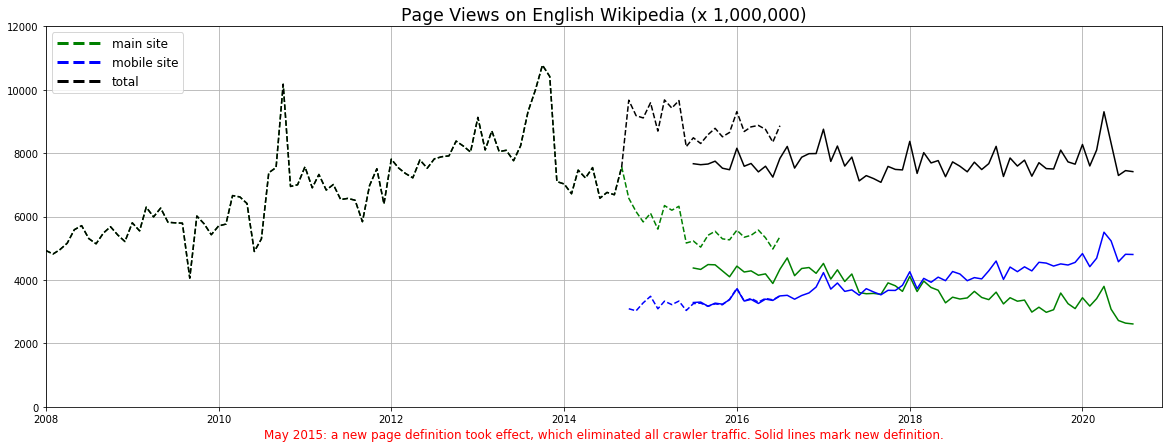

In [395]:
# Creating a dates variable for easy visualization
dates = pd.to_datetime(df['year'].astype('str') + '-' + df['month'].astype('str'))

# Defining a colors array to match the colors in given problem
colors = ['green', 'blue','black']

# Defining a scale factor to adjust numbers on y axis
scale = 1000000

# Defining lines and labels for the legend
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['main site', 'mobile site', 'total']

plt.figure(figsize=(20,7))

# Plotting the page view dataseries first as solid lines
plt.plot(dates, df.pageview_desktop_views/scale, c = colors[0])
plt.plot(dates, df.pageview_mobile_views/scale, c = colors[1])
plt.plot(dates, df.pageview_all_views/scale, c = colors[2])

# Plotting the page count dataseries as dotted lines
plt.plot(dates, df.pagecount_desktop_views/scale, c = colors[0], linestyle = '--')
plt.plot(dates, df.pagecount_mobile_views/scale, c = colors[1], linestyle = '--')
plt.plot(dates, df.pagecount_all_views/scale, c = colors[2], linestyle = '--')

# Adjsuting the axis, grid, ticks etc.
plt.grid(which ='major')
plt.ylim([0,12000])
plt.xlim(['2008-01','2020-12'])
plt.tick_params(axis='both', which='major', labelsize=10)

# Displaying the legend on upper left column
plt.legend(lines, labels, loc = 'upper left', handlelength = 3.8, fontsize = 'large')

# Adjsuting the label and title
plt.xlabel("May 2015: a new page definition took effect, which eliminated all crawler traffic. Solid lines mark new definition.", color = 'red', size='large')
plt.title("Page Views on English Wikipedia (x 1,000,000)", size = 'xx-large')


# Saving the chart
plt.savefig("A.png")

plt.show()